In [25]:
# ODE solver
# with and without boundary conditions

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model

In [26]:
# our Neural network model

tf.keras.backend.set_floatx('float64')

inp = Input(shape=(1,))
x = Dense(100,activation='tanh')(inp)
x = Dense(100,activation='tanh')(x)
out = Dense(1)(x)

model = Model(inputs=inp,outputs=out)
model.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [27]:
# define training

optimizer = tf.keras.optimizers.Adam(1e-4)

a = tf.constant(1.,dtype="float64")
b = tf.constant(10.,dtype="float64")

# differential equation u''(x) + a u'(x) + b u(x)=0

# alpha is relative weight between normal loss and boundary condition loss
def train_step(samples,alpha=1., verbose=False):
    #bu0= tf.constant(1.,dtype='float64') # boundary condition
    #bdu0_dx=tf.constant(0.,dtype='float64') # boundary condition
    #alpha_b=tf.constant(alpha,dtype='float64') # boundary condition

    train_data = np.random.uniform(0,40,size=(samples,1))
    #train_data = np.random.normal(loc=0, scale=1, size=100) # gaussian
    #  # rescale to [-1,1] interval
    x = tf.Variable(train_data)
    #x0 = tf.Variable(np.zeros(shape=(samples,1))) # boundary condition
    with tf.GradientTape() as t3:
        with tf.GradientTape() as t2:
            with tf.GradientTape() as t1:
                u = model(x,training=True)
            #with tf.GradientTape() as t0: # boundary condition
                #u0 = model(x0,training=True) # boundary condition
            du_dx=t1.gradient(u,x)
            #du0_dx=t0.gradient(u0,x0) # boundary condition
        d2u_dx=t2.gradient(du_dx,x)
        loss = (d2u_dx + a*du_dx + b*u)**2
        #loss2 = (u0 - bu0)**2 + (du0_dx - bdu0_dx)**2 # boundary condition
        #loss = (d2u_dx + a*du_dx + b*u)**2 + alpha*loss2 # boundary condition
    gradients_of_nn = t3.gradient(loss,model.trainable_variables)
    optimizer.apply_gradients(zip(gradients_of_nn, model.trainable_variables))
    if verbose:
        print(np.mean(loss))

def train(epochs,print_every=100,alpha=1):
    for epoch in range(epochs):
        if epoch%print_every==0:
            print('Loss at epoch: '+str(epoch))
            train_step(300,alpha=alpha, verbose=True)
        else:
            train_step(300,alpha=alpha)

Loss at epoch: 0
23.90114680003005
Loss at epoch: 100
0.058115513334042274
Loss at epoch: 200
0.011648152075187058
Loss at epoch: 300
0.0029554880655612743


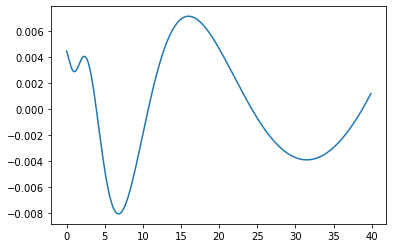

In [28]:
train(400)

preds = model.predict(np.arange(0,40,0.1))
plt.plot(np.arange(0,40,0.1),preds)


Loss at epoch: 0
0.0017113561135089714
Loss at epoch: 100
0.0011255455571700776
Loss at epoch: 200
0.0009634587173739797
Loss at epoch: 300
0.0007945653813736564


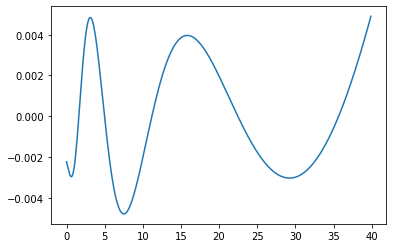

In [29]:
train(400)

preds = model.predict(np.arange(0,40,0.1))
plt.plot(np.arange(0,40,0.1),preds)